#Reading Samples

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


we have 3 different data bases with different labeling, the first objective is to integrate them all into three dataframe called, Walden, Voiced, and SVD.

In [ ]:
import os
from scipy.io import wavfile
import pandas as pd
import numpy as np
import seaborn as sns
import math
import re


##SVD

### labels

In [ ]:
path=r"/content/drive/MyDrive/SONAR/Database/SVD (Saarbrücken) samples"

In [ ]:
folder_conts=os.listdir(path)

In [ ]:
conts=[ i for i in folder_conts if not(i.endswith(".zip"))]

## renaming labels

In [ ]:
labeling=pd.read_excel("/content/drive/MyDrive/SONAR/Database/Labels.xlsx")
labeling=labeling[labeling["Database"].apply(lambda x: "SVD" in x)]
labeling["Original Label"]=labeling["Original Label"].apply(lambda x: x.split("(")[0].strip().lower())
labeling=labeling[["Label","Original Label"]]
labeling={j:i for i,j in labeling.values}
labeling.update({"dysodie":"Dysodie"})
labeling.update({'laryngitis, leukoplakie':"Laryngitis,Leukoplakia"})
labeling.update({'balbuties':'Bulbar Paralysis'})

## saving SVD database

In [ ]:
import h5py
import json
hdf5_file_path="/content/drive/MyDrive/hdf5_SVD_with_IDs.h5"
with h5py.File(hdf5_file_path,"w") as f:
  for i,(name,id,data) in enumerate(SVD):
    grp=f.create_group(f"dataset_{i}")
    grp.attrs["name"]=name
    grp.attrs["ID"]=id
    data_json=json.dumps([int(i) for i in data])
    grp.create_dataset("signal",data=data_json.encode("utf-8"))

##reading dataset

In [ ]:
import h5py
import json
import numpy as np
from IPython.display import clear_output
name,data,ID_N=[],[],[]
hdf5_file_path="/content/drive/MyDrive/hdf5_SVD_with_IDs.h5"
m=0
percent="["
percent+=" "*100
percent+="]"
with h5py.File(hdf5_file_path,"r") as f:
  a=len(f.keys())
  t=[[m,i] for m,i in zip(range(1,a,int(a/100)),range(1,100))]
  for i,key in enumerate(f.keys()):
    grp=f[key]
    name.append(grp.attrs["name"])
    ID_N.append(grp.attrs["ID"])
    signal_jason=grp["signal"][()].decode("utf-8")
    signal=json.loads(signal_jason)
    data.append(np.array(signal))

    if m<len(t) and i==t[m][0]:
      clear_output(wait=True)
      m+=1
      percent=percent[0:m]+"."+percent[m+1:]
      print(f"{t[m-1][1]} percent completed")
      print(percent)



99 percent completed
[................................................................................................... ]


In [ ]:
!pip install openl3

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openl3: filename=openl3-0.4.2-py2.py3-none-any.whl size=249327032 sha256=116fd7322c29d6e95f6d383b8ea87123bbf0ca1a55aaf87ffe8a03cf9a5d8c4c
  Stored in directory: /root/.cache/pip/wheels/d0/4d/0a/e57b1dc8ead91b3c5709d9de4f02d1cdd3a91f609a8f1c1062
  Created wheel for kapre: filename=kapre-0.3.7-py3-none-any.whl size=29601 sha256=dad090d65f5a446c465cc619681d875d7d5c4952072600a93e851ec5fbc72ca2
  Stored in directory: /root/.cache/pip/wheels/3e/54/f9/37e9f36590a5431dc207f7dc0eb2e607ff8958d5728e45ef58
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320708 sha256=80d14e98443e6addd1e862aa0c64107163f3ad888df08ad700c8f7fdcd8fa012
  Stored in directory: /root

In [ ]:
import openl3

In [ ]:
classes=['Dysphonie', 'Funktionelle Dysphonie', 'Healthy',
       'Hyperfunktionelle Dysphonie', 'Laryngitis',
       'Psychogene Dysphonie', 'Rekurrensparese',
       'Spasmodische Dysphonie']

##preprocessing samples

In [ ]:
index=list(map(lambda x: x in classes,name))
name=np.array(name)[index]
data=[data[i] for i in range(len(data)) if index[i]]

In [ ]:
m=np.unique(np.array(name),return_counts=True)
list(zip(m[0],m[1]))

[('Dysphonie', 59),
 ('Funktionelle Dysphonie', 70),
 ('Healthy', 651),
 ('Hyperfunktionelle Dysphonie', 128),
 ('Laryngitis', 73),
 ('Psychogene Dysphonie', 45),
 ('Rekurrensparese', 160),
 ('Spasmodische Dysphonie', 53)]

In [ ]:
preprocessed_audio=[openl3.core._preprocess_audio_batch(wav,50000,hop_size=0.5,center=True) for wav in data]

/usr/local/lib/python3.10/dist-packages/openl3/core.py:82: OpenL3Warning: Duration of provided audio is shorter than window size (1 second). Audio will be padded.
  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',


In [ ]:
len(preprocessed_audio)

1239

In [ ]:
labels=name

In [ ]:
Audios=[]
labels_all=[]
IDs_all=[]
for i,k in enumerate(preprocessed_audio):
  for j in k:
    Audios.append(j)
    labels_all.append(labels[i])
    IDs_all.append(ID_N[i])


In [ ]:
len(Audios),len(labels_all),len(IDs_all)

(3953, 3953, 3953)

In [ ]:
m=np.unique(np.array(labels_all),return_counts=True)
k=np.argsort(np.array(m[1]))
m=[(m[0][i],m[1][i]) for i in k]
m[::-1]

[('Healthy', 2046),
 ('Rekurrensparese', 518),
 ('Hyperfunktionelle Dysphonie', 440),
 ('Laryngitis', 226),
 ('Funktionelle Dysphonie', 221),
 ('Dysphonie', 189),
 ('Spasmodische Dysphonie', 168),
 ('Psychogene Dysphonie', 145)]

In [ ]:
Audios=np.array(Audios)

In [ ]:
Audios=Audios.reshape(-1,Audios.shape[2])

In [ ]:
len(labels_all),Audios.shape

(3953, (3953, 48000))

In [ ]:
labeling.update({"healthy":"Healthy"})

In [ ]:
m=np.unique(np.array(labels_all),return_counts=True)
k=pd.DataFrame(np.array([[i , j] for i,j in zip(np.array([labeling[i.lower()] for i in m[0]]),m[1])]),columns=["Pathologies","Frequencies"])
k['Frequencies'] = pd.to_numeric(k['Frequencies'])
k1=k.sort_values( by="Frequencies",ascending=False )
k1

,Pathologies,Frequencies
2,Healthy,2046
6,Recurrent Laryngeal Nerve Paralysis,518
3,Hyperfunctional dysphonia,440
4,Laryngitis,226
1,Functional Dysphonia,221
0,Dysphonia,189
7,Spasmodic Dysphonia,168
5,Psychogenic Dysphonia,145


##Labels

In [ ]:
len(set(labels_all))

8

##X,y

In [ ]:

X=Audios

y=np.array(labels_all)
y1=np.array([labeling[i.lower()] for i in y]).reshape(-1,1)
y=y1

In [ ]:
X=X.reshape(X.shape[0],1,X.shape[1])

In [ ]:
X.shape,y.shape

((3953, 1, 48000), (3953, 1))

#Loading model

In [ ]:
import tensorflow as tf

In [ ]:
basemodel=openl3.models.load_audio_embedding_model("mel128",embedding_size=512,content_type="music")

In [ ]:
basemodel.trainable=False

##mel spectrogram

In [ ]:
def _log10(x):
    '''log10 tensorflow function.'''
    return tf.math.log(x) / tf.math.log(tf.constant(10, dtype=x.dtype))

def kapre_v0_1_4_magnitude_to_decibel(x, ref_value=1.0, amin=1e-10, dynamic_range=80.0):
    '''log10 tensorflow function.'''
    amin = tf.cast(amin or 1e-10, dtype=x.dtype)
    max_axis = tuple(range(K.ndim(x))[1:]) or None
    log_spec = 10. * _log10(K.maximum(x, amin))
    return K.maximum(
        log_spec - K.max(log_spec, axis=max_axis, keepdims=True),
        -dynamic_range)
from tensorflow.keras.layers import (
        Input, Conv2D, Permute, BatchNormalization, MaxPooling2D,
        Flatten, Activation, Lambda)
import tensorflow.keras.backend as K
def __fix_kapre_spec(func):
    '''Wraps the kapre composite layer interface to revert .'''
    def get_spectrogram(*a, return_decibel=False, **kw):
        seq = func(*a, return_decibel=False, **kw)
        if return_decibel:
            seq.add(Lambda(kapre_v0_1_4_magnitude_to_decibel))
        seq.add(Permute((2, 1, 3)))  # the output is (None, t, f, ch) instead of (None, f, t, ch), so gotta fix that
        return seq
    return get_spectrogram


weight_decay = 1e-5
n_dft = 2048
n_mels = 128
n_hop = 242
asr = 48000
audio_window_dur = 1

input_shape = (1, int(asr * audio_window_dur))
x_a = tf.keras.Input(shape=input_shape, dtype='float32')

# MELSPECTROGRAM PREPROCESSING
# 128 x 199 x 1
from kapre.composed import get_melspectrogram_layer
spec = __fix_kapre_spec(get_melspectrogram_layer)(
    input_shape=input_shape,
    n_fft=n_dft, hop_length=n_hop, n_mels=n_mels,
    sample_rate=asr, return_decibel=True, pad_end=True,
    input_data_format='channels_first',
    output_data_format='channels_last')
y_a = spec(x_a)


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Function to compute the Grad-CAM heatmap
def compute_gradcam(model, img_array, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.Model(inputs=model.get_layer("batch_normalization").input, outputs=[model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Function to overlay the heatmap on the original image
def overlay_heatmap(img_array, heatmap, alpha=0.4):
    heatmap = np.uint8(255 * heatmap)
    jet = plt.cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img_array.shape[2], img_array.shape[1]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    img = img_array[0]  # Remove batch dimension
    img = np.repeat(img, 3, axis=-1) if img.shape[-1] == 1 else img  # Ensure RGB format

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    return superimposed_img

img_array =a[4].reshape(-1,128,199,1)
heatmap = compute_gradcam(model_final, img_array, "audio_embedding_layer")

# Overlay heatmap on the original image
superimposed_img = overlay_heatmap(img_array, heatmap)

# Display the result
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()

TypeError: 'int' object is not subscriptable

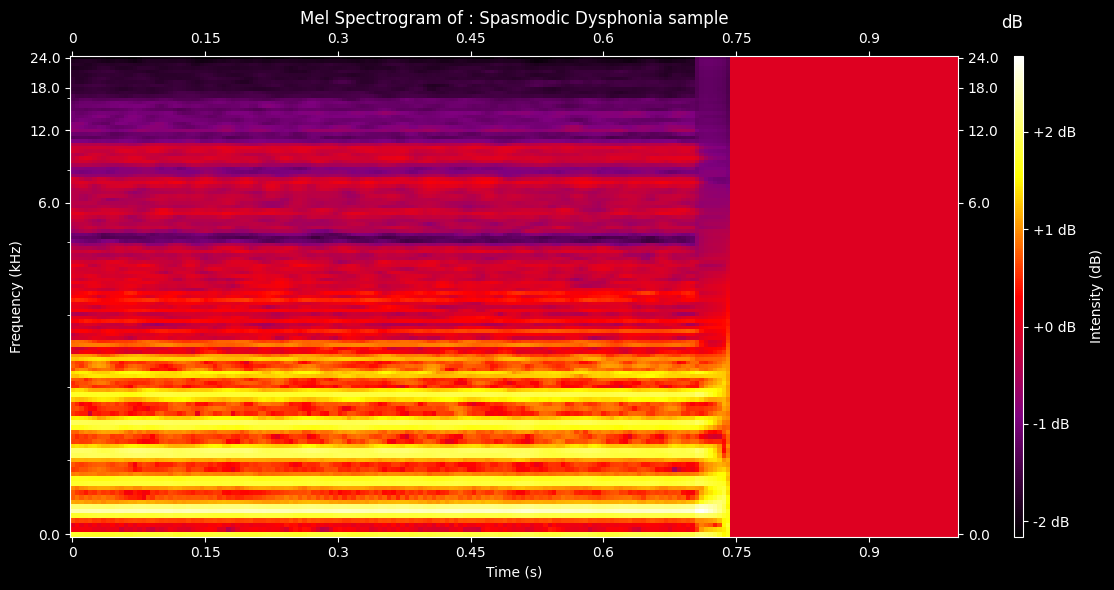

In [ ]:
I.plot_map(a[4],y_test[0,0])

In [ ]:

model1=tf.keras.Model(x_a,y_a)

In [ ]:
model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 48000)]        0         
                                                                 
 melspectrogram (Sequential  (None, 128, 199, 1)       0         
 )                                                               
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
a=model1.predict(X_test)

31/31 [==============================] - 2s 80ms/step


In [ ]:
a.shape

(989, 128, 199, 1)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import librosa.display
import numpy as np
from sklearn.preprocessing import StandardScaler
class Heatmap:
  def __init__(self):
    pass
  def plot_map(self,a,label):

    # Your Mel spectrogram data (replace this with your actual data array)
    sc=StandardScaler()
    S_dB = sc.fit_transform(a.reshape(-1,199))  # This should be your 128x199 array

    # Sampling rate
    sr = 48000  # 48 kHz

    # Duration of the data
    duration = 1.0  # 1 second

    # Custom colormap: dark to red to white
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_map', ['black', 'purple', 'red', 'yellow', 'white'])

    # Set up the figure and axis
    plt.figure(figsize=(12, 6))
    plt.style.use('dark_background')  # Set the plot background to black

    # Display the Mel spectrogram
    img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel',
                                  fmax=sr/2, cmap=cmap, hop_length=242, vmin=S_dB.min(),vmax=S_dB.max())

    # Add a color bar to the right
    cbar = plt.colorbar(img, orientation='vertical', aspect=50, format='%+2.0f dB')
    cbar.set_label('Intensity (dB)', labelpad=10)

    # Place the description of the color bar directly under it
    cbar.ax.set_title('dB', loc='right', pad=20, color='white')

    # Adjust the ticks on the color bar
    cbar.ax.yaxis.set_ticks_position('right')

    # Customize the axes
    #plt.xticks(np.linspace(0, duration, num=5))  # Time in seconds
    # Frequency in kHz, correct ordering with librosa's utility
    mel_frequencies = librosa.mel_frequencies(n_mels=128, fmax=sr/2)  # Convert Hz to kHz
    plt.yticks(np.linspace(0, mel_frequencies.max(), num=5),
              [f'{freq:.1f}' for freq in np.linspace(0, sr/2000, num=5)])  # Display in kHz

    # Add secondary x-axis (top) and y-axis (right)
    plt.gca().xaxis.set_tick_params(top=True, labeltop=True)
    plt.gca().yaxis.set_tick_params(right=True, labelright=True)

    # Add title and labels
    plt.title(f'Mel Spectrogram of : {label} sample')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (kHz)')

    # Show the plot
    plt.tight_layout()
    plt.show()



In [ ]:
I=Heatmap()

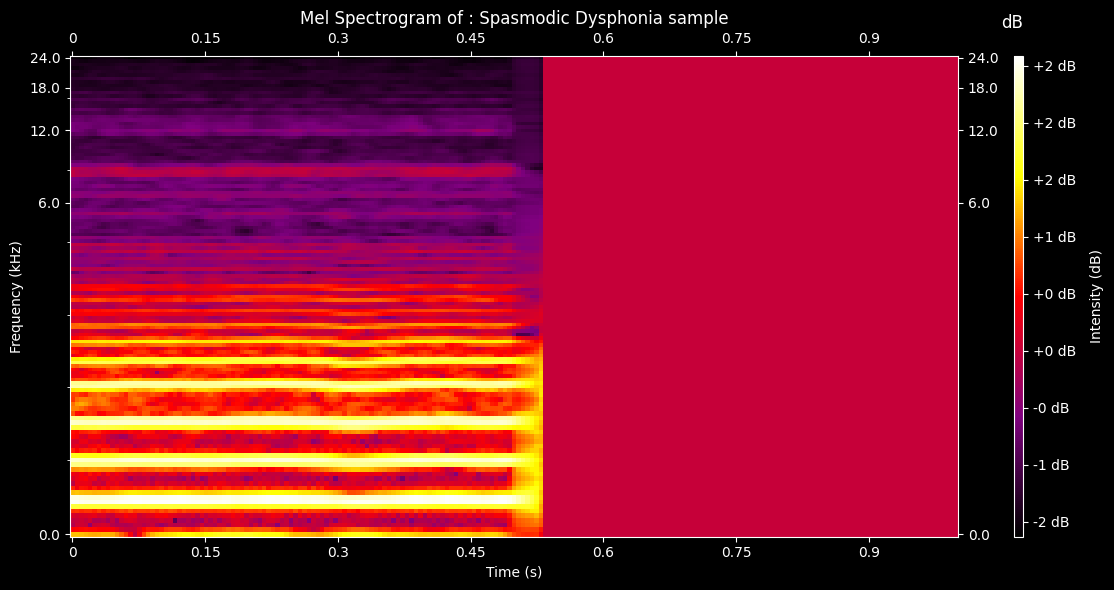

In [ ]:
I.plot_map(a[0],y_test[0,0])

##heatmap

<Axes: >

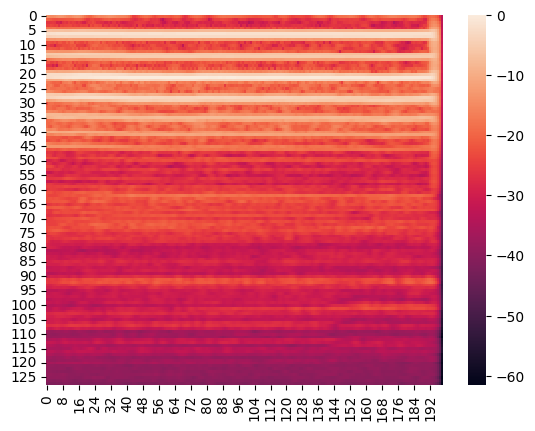

In [ ]:
sns.heatmap(a.reshape(128,199))

<Axes: >

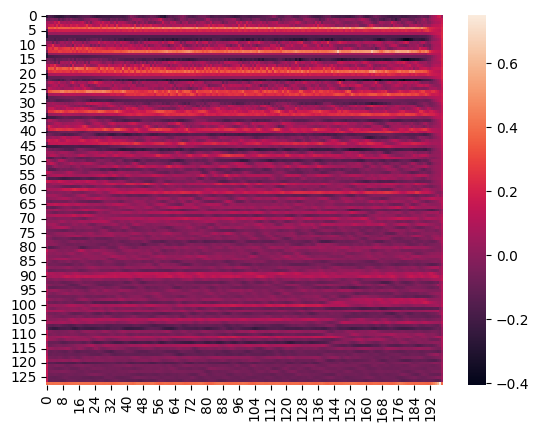

In [ ]:
sns.heatmap(np.mean(b[0][0,:,:,:],axis=2).reshape(128,199))

<Axes: >

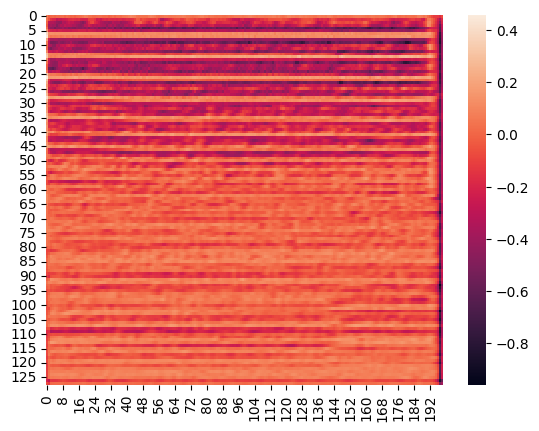

In [ ]:
sns.heatmap(np.mean(b[1][0,:,:,:],axis=2).reshape(128,199))

<Axes: >

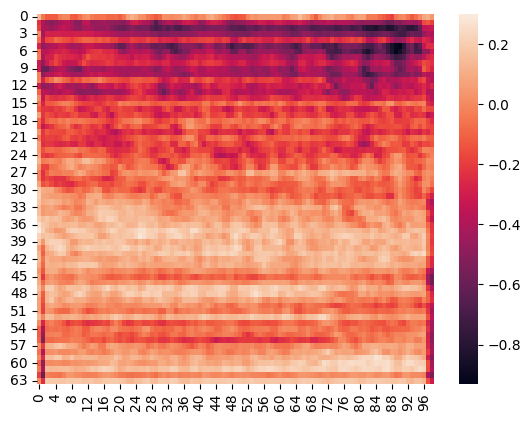

In [ ]:
sns.heatmap(np.mean(b[2][0,:,:,:],axis=2).reshape(64,99))

<Axes: >

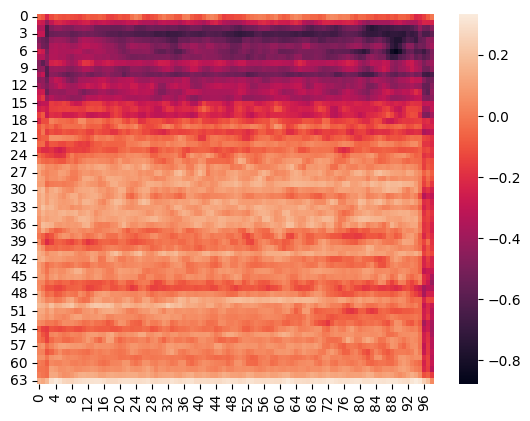

In [ ]:
sns.heatmap(np.mean(b[3][0,:,:,:],axis=2).reshape(64,99))

<Axes: >

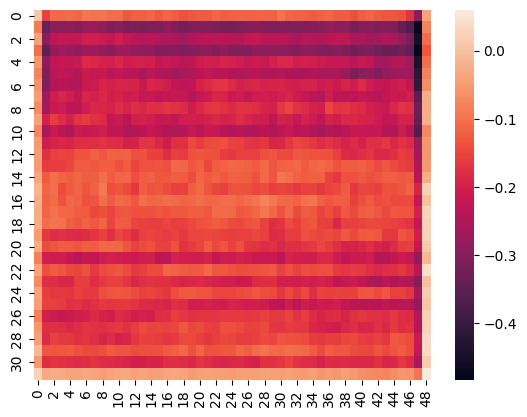

In [ ]:
sns.heatmap(np.mean(b[4][0,:,:,:],axis=2).reshape(32,49))

<Axes: >

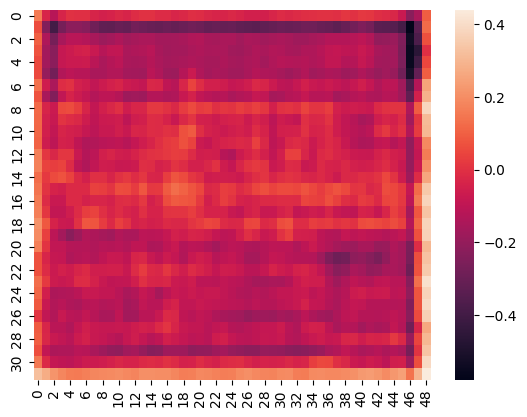

In [ ]:
sns.heatmap(np.mean(b[5][0,:,:,:],axis=2).reshape(32,49))

<Axes: >

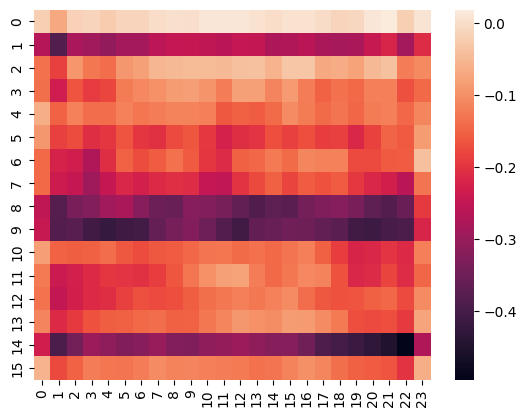

In [ ]:
sns.heatmap(np.mean(b[6][0,:,:,:],axis=2).reshape(16,24))

<Axes: >

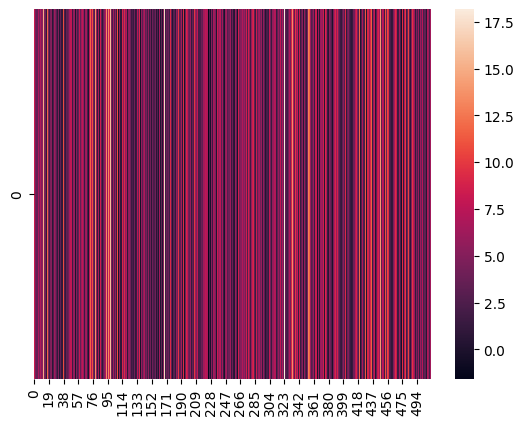

In [ ]:
sns.heatmap(b[7][0,:,:,:].reshape(1,512))

##model final new method

In [ ]:
np.unique(y)

array(['Dysphonia', 'Functional Dysphonia', 'Healthy',
       'Hyperfunctional dysphonia', 'Laryngitis', 'Psychogenic Dysphonia',
       'Recurrent Laryngeal Nerve Paralysis', 'Spasmodic Dysphonia'],
      dtype='<U35')

In [ ]:
x=basemodel.output
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dense(128,activation="relu")(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(128,activation="relu")(x)
x=tf.keras.layers.Dense(8,activation="softmax")(x)
model_final=tf.keras.Model(inputs=basemodel.input,outputs=x)

In [ ]:
model_final.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 48000)]        0         
                                                                 
 melspectrogram (Sequential  (None, 128, 199, 1)       0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 128, 199, 1)       4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 128, 199, 64)      640       
                                                                 
 batch_normalization_1 (Bat  (None, 128, 199, 64)      256       
 chNormalization)                                                
                                                           

##Embedding model

In [ ]:


Embedding=tf.keras.Model(model_final.input,model_final.get_layer("flatten").output)

In [ ]:
grad=tf.keras.Model(model_final.input,outputs=[model_final.get_layer("audio_embedding_layer").output,model_final.output])

##compile model

In [ ]:


model_final.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['Accuracy'])

##label encoder

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y=le.transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
y=le.transform(y)

ValueError: y contains previously unseen labels: '1'

In [ ]:
le.classes_


array(['Dysphonia', 'Functional Dysphonia', 'Healthy',
       'Hyperfunctional dysphonia', 'Laryngitis', 'Psychogenic Dysphonia',
       'Recurrent Laryngeal Nerve Paralysis', 'Spasmodic Dysphonia'],
      dtype='<U35')

##train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test,ID_train,ID_test = train_test_split(X, y,np.array(IDs_all),test_size = 0.25 ,random_state=42)

In [ ]:
X_test.shape,y_test.shape,ID_test.shape

((989, 1, 48000), (989,), (989,))

##testing balance

In [ ]:
[(len([k for k in y_test if k==m]),le.inverse_transform([[k for k in y_test if k==m][0]])[0]) for m in set(y_test)]

[(43, 'Dysphonia'),
 (58, 'Functional Dysphonia'),
 (513, 'Healthy'),
 (114, 'Hyperfunctional dysphonia'),
 (58, 'Laryngitis'),
 (41, 'Psychogenic Dysphonia'),
 (127, 'Recurrent Laryngeal Nerve Paralysis'),
 (35, 'Spasmodic Dysphonia')]

##testing train test shape

In [ ]:
X_train.shape,y_train.shape

((2964, 1, 48000), (2964,))

##load save model

In [ ]:
model_final.load_weights("/content/drive/MyDrive/SONAR_SVD_specific_90.h5")

In [ ]:
#model_final.save("/content/drive/MyDrive/SONAR_SVD_specific_90.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##fit deep model

In [ ]:
for i in model_final.layers[-11:]:
  i.trainable=True

In [ ]:
model_final.summary()

NameError: name 'model_final' is not defined

In [ ]:
model_final.evaluate(X_test,y_test)

31/31 [==============================] - 38s 1s/step - loss: 0.4920 - Accuracy: 0.9019


[0.49202868342399597, 0.9019211530685425]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Metric to be monitored (e.g., 'val_loss', 'val_accuracy')
    patience=7,            # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode, 1 for more detailed messages
    restore_best_weights=True  # Whether to restore model weights from the epoch with the best value of the monitored quantity
)

# Assuming you have your model and data ready
history = model_final.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,             # Maximum number of epochs to train
    batch_size=128,
    callbacks=[early_stopping]  # Pass the callback to the fit method
)

Epoch 1/100


In [ ]:
history1 = model_final.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,             # Maximum number of epochs to train
    batch_size=128,
    initial_epoch=len(history.epoch),
    callbacks=[early_stopping]  # Pass the callback to the fit method
)

Epoch 33/100
24/24 [==============================] - 20s 544ms/step - loss: 1.9374 - Accuracy: 0.5105 - val_loss: 11.4594 - val_Accuracy: 0.5238
Epoch 34/100
24/24 [==============================] - 11s 471ms/step - loss: 0.9762 - Accuracy: 0.6657 - val_loss: 5.1706 - val_Accuracy: 0.5329
Epoch 35/100
24/24 [==============================] - 11s 474ms/step - loss: 0.6367 - Accuracy: 0.7821 - val_loss: 2.5644 - val_Accuracy: 0.4995
Epoch 36/100
24/24 [==============================] - 11s 460ms/step - loss: 0.4123 - Accuracy: 0.8721 - val_loss: 1.7744 - val_Accuracy: 0.6158
Epoch 37/100
24/24 [==============================] - 11s 452ms/step - loss: 0.2702 - Accuracy: 0.9190 - val_loss: 1.9127 - val_Accuracy: 0.4884
Epoch 38/100
24/24 [==============================] - 11s 448ms/step - loss: 0.1896 - Accuracy: 0.9477 - val_loss: 1.0467 - val_Accuracy: 0.7280
Epoch 39/100
24/24 [==============================] - 11s 446ms/step - loss: 0.1483 - Accuracy: 0.9585 - val_loss: 1.3061 - val_A

In [ ]:
history2 = model_final.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,             # Maximum number of epochs to train
    batch_size=64,
    initial_epoch=71,
    callbacks=[early_stopping]  # Pass the callback to the fit method
)

Epoch 72/100
47/47 [==============================] - 11s 240ms/step - loss: 0.0835 - Accuracy: 0.9838 - val_loss: 0.5425 - val_Accuracy: 0.8938
Epoch 73/100
47/47 [==============================] - 11s 230ms/step - loss: 0.0714 - Accuracy: 0.9841 - val_loss: 0.4920 - val_Accuracy: 0.9019
Epoch 74/100
47/47 [==============================] - 11s 238ms/step - loss: 0.0678 - Accuracy: 0.9872 - val_loss: 0.5011 - val_Accuracy: 0.8979
Epoch 75/100
47/47 [==============================] - 11s 233ms/step - loss: 0.0698 - Accuracy: 0.9862 - val_loss: 0.5149 - val_Accuracy: 0.9009
Epoch 76/100
47/47 [==============================] - 11s 230ms/step - loss: 0.0694 - Accuracy: 0.9852 - val_loss: 0.5208 - val_Accuracy: 0.8969
Epoch 77/100
47/47 [==============================] - 11s 226ms/step - loss: 0.0668 - Accuracy: 0.9858 - val_loss: 0.5269 - val_Accuracy: 0.9009
Epoch 78/100
47/47 [==============================] - 10s 224ms/step - loss: 0.0642 - Accuracy: 0.9885 - val_loss: 0.5282 - val_Ac

In [ ]:
history3 = model_final.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=110,             # Maximum number of epochs to train
    batch_size=32,
    initial_epoch=93,
    callbacks=[early_stopping]  # Pass the callback to the fit method
)

Epoch 94/110
93/93 [==============================] - 17s 124ms/step - loss: 0.6062 - Accuracy: 0.8262 - val_loss: 3.0687 - val_Accuracy: 0.4307
Epoch 95/110
93/93 [==============================] - 11s 118ms/step - loss: 0.5747 - Accuracy: 0.8219 - val_loss: 0.6542 - val_Accuracy: 0.8220
Epoch 96/110
93/93 [==============================] - 11s 120ms/step - loss: 0.2248 - Accuracy: 0.9356 - val_loss: 0.5691 - val_Accuracy: 0.8423
Epoch 97/110
93/93 [==============================] - 11s 117ms/step - loss: 0.1490 - Accuracy: 0.9649 - val_loss: 0.6546 - val_Accuracy: 0.8281
Epoch 98/110
93/93 [==============================] - 11s 115ms/step - loss: 0.1221 - Accuracy: 0.9700 - val_loss: 0.5765 - val_Accuracy: 0.8402
Epoch 99/110
93/93 [==============================] - 10s 112ms/step - loss: 0.0905 - Accuracy: 0.9791 - val_loss: 0.5736 - val_Accuracy: 0.8665
Epoch 100/110
93/93 [==============================] - 10s 112ms/step - loss: 0.0961 - Accuracy: 0.9764 - val_loss: 1.0526 - val_A

In [ ]:
history1.history

{'loss': [2.5387909412384033,
  1.1899679899215698,
  0.7639975547790527,
  0.5141370296478271,
  0.3489839434623718,
  0.29796019196510315,
  0.2522445023059845,
  0.1748759001493454,
  0.14895829558372498,
  0.11494269967079163,
  0.10665546357631683,
  0.14567461609840393,
  0.1843465119600296,
  0.18755562603473663,
  0.1664423942565918,
  0.17103531956672668,
  0.1676180213689804,
  0.12547385692596436,
  0.10176592320203781,
  0.09071210026741028,
  0.08266399800777435,
  0.08088372647762299,
  0.07661382108926773,
  0.059026915580034256,
  0.0521065816283226,
  0.04636409878730774,
  0.046544741839170456,
  0.04170547053217888,
  0.044815726578235626,
  0.04031065106391907,
  0.03697894886136055,
  0.040897272527217865,
  0.05633830279111862,
  0.06800142675638199,
  0.06582867354154587,
  0.07188764214515686,
  0.06538663804531097,
  0.07065106928348541,
  0.09951606392860413,
  0.11469762772321701,
  0.11461895704269409,
  0.09706065058708191,
  0.07237706333398819,
  0.059215

In [ ]:
import matplotlib.pyplot as plt

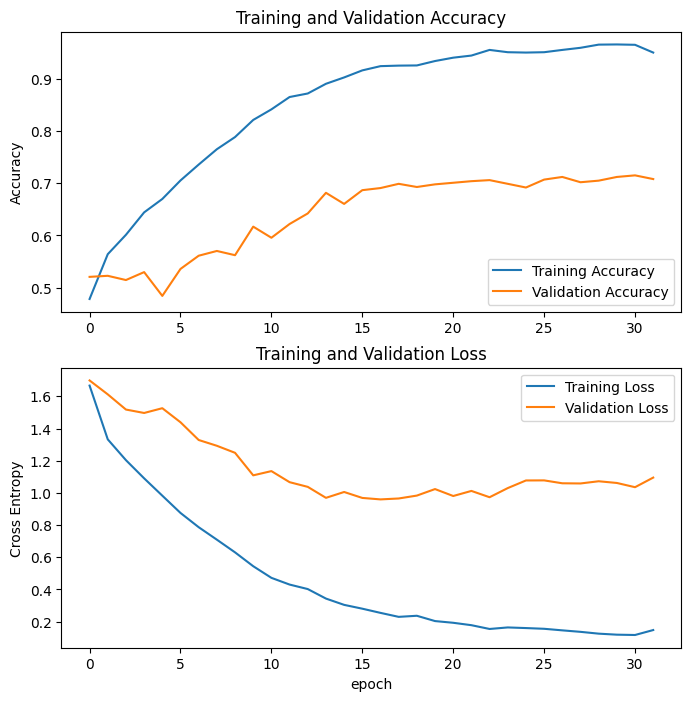

In [ ]:
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
acc += history1.history['Accuracy']
val_acc += history1.history['val_Accuracy']
acc += history2.history['Accuracy']
val_acc += history2.history['val_Accuracy']
loss += history1.history['loss']
val_loss += history1.history['val_loss']
loss += history2.history['loss']
val_loss += history2.history['val_loss']

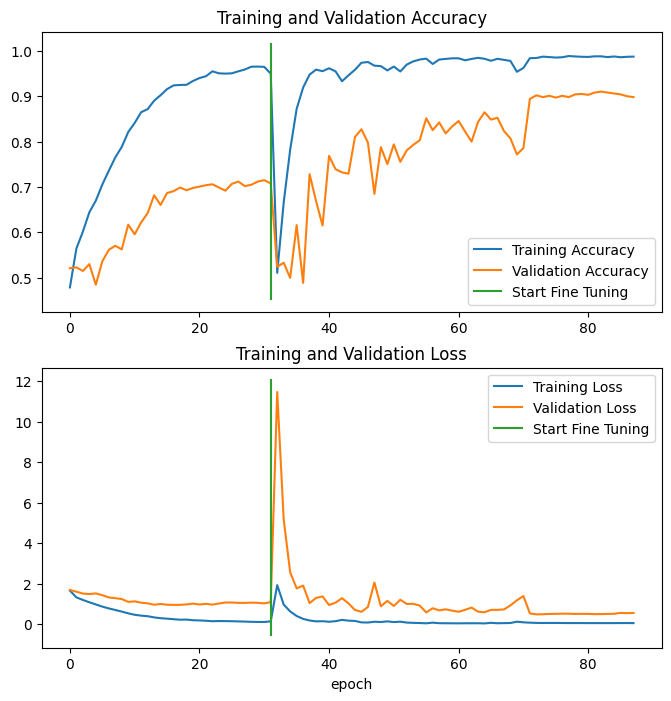

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

plt.plot([len(history.epoch)-1,len(history.epoch)-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

plt.plot([len(history.epoch)-1,len(history.epoch)-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


##prediction

In [ ]:
f=model_final.predict(X_test)

31/31 [==============================] - 62s 2s/step


In [ ]:
y_pred = np.argmax(f,axis=1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [2 2]
 [6 6]
 ...
 [3 3]
 [2 2]
 [2 2]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 36   0   2   1   1   0   3   0]
 [  0  40   8   2   2   0   6   0]
 [  2   0 501   2   3   0   4   1]
 [  0   5   7  98   0   1   2   1]
 [  0   1   2   1  49   0   5   0]
 [  0   0   4   4   1  31   1   0]
 [  2   2   6   0   3   0 111   3]
 [  0   2   2   4   0   0   1  26]]


0.9019211324570273

In [ ]:
mx=[ {"TP":np.sum([[cm[i,j] if (j==k and i==j) else 0 for j in range(cm.shape[1]) ] for i in range(cm.shape[0])]),
   "TN":np.sum([[cm[i,j] if (j!=k and i!=k) else 0 for j in range(cm.shape[1]) ] for i in range(cm.shape[0])]),
   "FP":np.sum([[cm[i,j] if (j==k and i!=j) else 0 for j in range(cm.shape[1]) ] for i in range(cm.shape[0])]),
   "FN":np.sum([[cm[i,j] if (i==k and i!=j) else 0 for j in range(cm.shape[1]) ] for i in range(cm.shape[0])]),
   "N":np.sum([[cm[i,j] if (i==k ) else 0 for j in range(cm.shape[1]) ] for i in range(cm.shape[0])])
}
  for k in range(len(le.classes_))]

In [ ]:
np.sum([(mx[i]["TP"]/(mx[i]["TP"]+mx[i]["FN"]))*mx[i]["N"] for i,_ in enumerate(le.classes_)])/np.sum([mx[i]["N"] for i,_ in enumerate(le.classes_)])

0.9019211324570273

In [ ]:
np.mean([mx[i]["TP"]/(mx[i]["TP"]+mx[i]["FN"]) for i,_ in enumerate(le.classes_)])

0.8226149778440051

In [ ]:
np.mean([mx[i]["TN"]/(mx[i]["TN"]+mx[i]["FP"]) for i,_ in enumerate(le.classes_)])

0.9826681698022457

<ipython-input-47-286625105500>:48: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=np.linspace(0, 100, num=11))


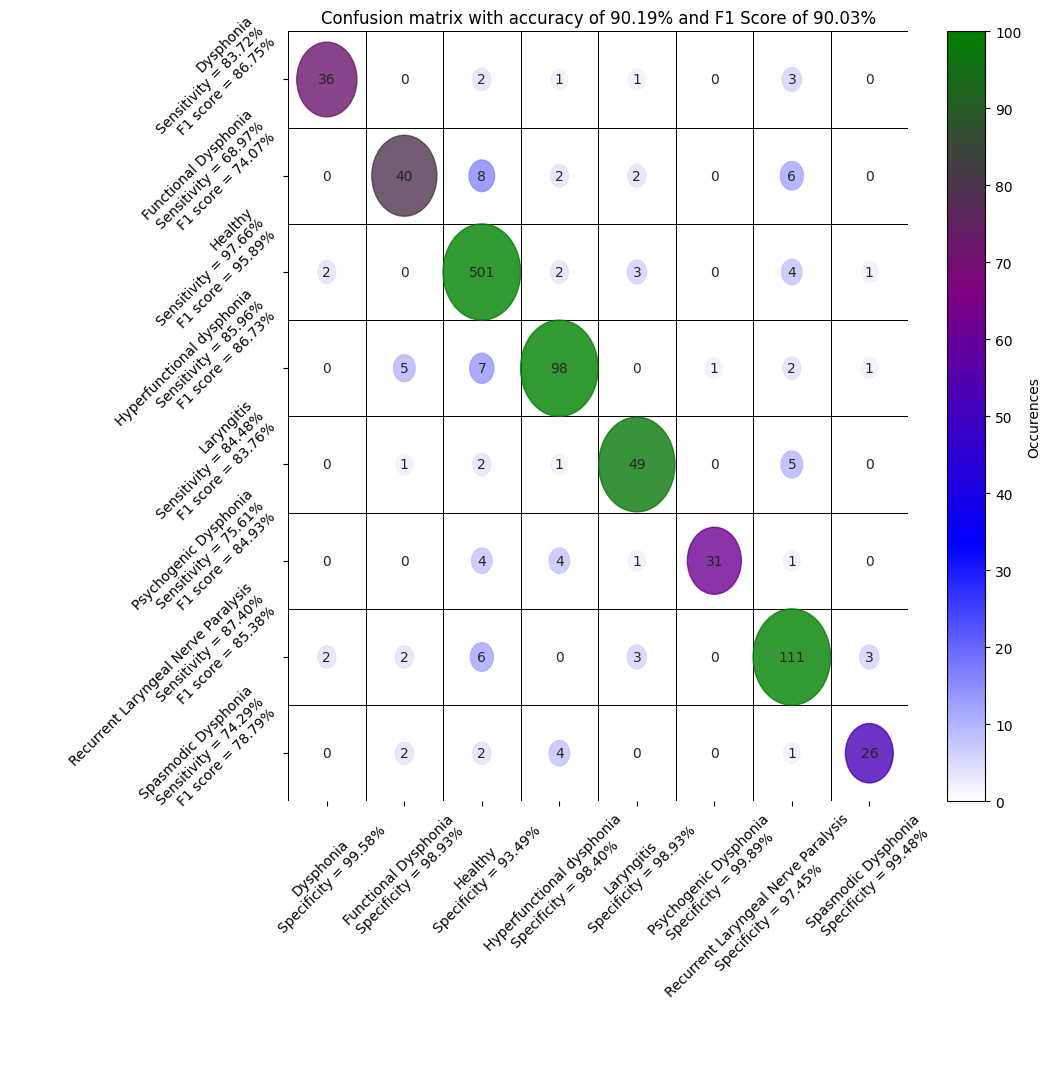

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
cmap = mcolors.LinearSegmentedColormap.from_list('custom_map', ['white', "blue","purple","green"  ])
plt.figure(figsize=(10, 10))


sns.heatmap(cm, annot=True, fmt=".0f", cbar=False,cmap="afmhot_r" ,vmax=100000,linecolor="black",linewidths=0.4,
            xticklabels=[m+"\nSpecificity = "+"{SPEC:.2f}%".format(SPEC=mx[i]["TN"]/(mx[i]["TN"]+mx[i]["FP"])*100) if i != 6
                         else m+"\nSpecificity = "+"{SPEC:.2f}%".format(SPEC=mx[i]["TN"]/(mx[i]["TN"]+mx[i]["FP"])*100)+"\n"*5
                         for i,m in enumerate(le.classes_)],
            yticklabels=[m+"\nSensitivity = "+"{SEN:.2f}%".format(SEN=mx[i]["TP"]/(mx[i]["TP"]+mx[i]["FN"])*100)+
                         "\nF1 score = {F1:.2f}%".format(F1=200*mx[i]["TP"]/(2*mx[i]["TP"]+mx[i]["FP"]+mx[i]["FN"])) if i != 6
                          else "\n"*5+m+"\nSensitivity = "+"{SEN:.2f}%".format(SEN=mx[i]["TP"]/(mx[i]["TP"]+mx[i]["FN"])*100)+
                         "\nF1 score = {F1:.2f}%".format(F1=200*mx[i]["TP"]/(2*mx[i]["TP"]+mx[i]["FP"]+mx[i]["FN"]))
                          for i,m in enumerate(le.classes_)])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Confusion matrix with accuracy of {accuracy:.2f}% and F1 Score of {F1:.2f}%".format(
    accuracy=(np.sum([mx[i]["TP"] for i,_ in enumerate(le.classes_)])/np.sum(cm)*100),
    F1=np.sum([2*mx[i]["TP"]/(2*mx[i]["TP"]+mx[i]["FP"]+mx[i]["FN"])*mx[i]["N"] for i,m in enumerate(le.classes_)])*100/np.sum([mx[i]["N"] for i,m in enumerate(le.classes_)])
    ))
# Normalize the data for circle sizes
max_val = np.max(cm)  # Set the maximum value for normalization and color scale
normalized_data = cm / 50
for i,n in enumerate(normalized_data):
  for j,m in enumerate(n):
    if m>=1:
      normalized_data[i,j]=1

# Overlay circles
for y in range(cm.shape[0]):
    for x in range(cm.shape[1]):
        size = normalized_data[y, x] * 0.4+0.1 # Adjust this factor to control the circle size
        color = cmap(normalized_data[y, x])  # Use the same colormap for color
        circle = plt.Circle((x + 0.5, y + 0.5), size, color=color, alpha=0.8)
        plt.gca().add_artist(circle)

# Add labels and show plot
# Replace 'le.classes_' with your actual class labels
norm = Normalize(vmin=0, vmax=100)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for the color bar

cbar = plt.colorbar(sm, ticks=np.linspace(0, 100, num=11))
cbar.ax.set_yticklabels([str(int(i)) for i in np.linspace(0, 100, num=11)])
cbar.set_label('Occurences')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.86746988, 0.74074074, 0.95885167, 0.86725664, 0.83760684,
       0.84931507, 0.85384615, 0.78787879])

In [ ]:
f1_score(y_test, y_pred, average='macro')

0.8453707224866291

In [ ]:
model_final.evaluate(X_test,y_test)

31/31 [==============================] - 2s 69ms/step - loss: 0.4920 - Accuracy: 0.9019


[0.49202823638916016, 0.9019211530685425]

In [ ]:
a=Embedding.predict(X_train)

93/93 [==============================] - 6s 65ms/step


In [ ]:
a

array([[1.6554631 , 0.6311464 , 2.0406234 , ..., 2.798424  , 0.95339304,
        3.5003533 ],
       [2.6852698 , 0.42091972, 2.222858  , ..., 2.4510043 , 1.1658356 ,
        5.342297  ],
       [2.8662343 , 0.29546207, 3.1842413 , ..., 3.2059853 , 1.4798825 ,
        6.3381696 ],
       ...,
       [2.4692318 , 0.73036945, 3.0294034 , ..., 2.75762   , 1.3977853 ,
        6.4046054 ],
       [1.3210243 , 0.598609  , 2.172058  , ..., 2.136596  , 0.4170838 ,
        3.8947325 ],
       [2.2167504 , 0.7695794 , 2.359442  , ..., 2.2416062 , 1.33404   ,
        4.7137656 ]], dtype=float32)

##saving features

In [ ]:
a=Embedding.predict(X)

124/124 [==============================] - 8s 67ms/step


In [ ]:
le.inverse_transform(y_train)

array(['Healthy', 'Healthy', 'Laryngitis', ..., 'Laryngitis', 'Healthy',
       'Rekurrensparese'], dtype='<U77')

In [ ]:
q= ["label","IDs"]
q.extend([f"feature{i}" for i in range(1,513)])
d=pd.DataFrame(np.column_stack([np.array(le.inverse_transform(y)).reshape(-1,1),IDs_all,a]),columns=q)

In [ ]:
d

,label,IDs,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512
0,Functional Dysphonia,1862-a_n.wav,19.52432,5.2890105,2.9520328,15.693838,15.009126,24.568638,15.75542,13.859577,...,7.2169523,5.623449,6.3327627,13.093073,12.070578,30.046972,15.656656,21.783606,12.416537,14.793615
1,Functional Dysphonia,1862-a_n.wav,13.332289,6.4419208,9.1139555,15.426594,0.2824492,28.32874,17.628555,13.882366,...,6.629937,5.0550685,8.009653,12.965859,13.455625,15.253992,2.5255792,1.0145503,13.565293,19.153475
2,Functional Dysphonia,1862-a_n.wav,12.4918375,7.2370725,9.586142,15.670909,0.2597208,28.416769,17.817415,12.132001,...,6.4169345,6.2622643,10.7094,13.281124,9.844243,15.681532,2.2467666,1.682954,13.499361,18.269562
3,Functional Dysphonia,1862-a_n.wav,37.910763,6.2623816,9.359665,15.248366,32.187565,26.8354,15.739167,12.6972475,...,5.983292,5.879438,14.960404,14.109258,11.24417,54.336136,28.553417,29.880945,12.918743,16.77003
4,Functional Dysphonia,1645-a_n.wav,22.370491,6.7796235,5.3231144,15.896738,18.507006,21.991024,13.031505,10.122149,...,10.397286,11.655658,16.914843,3.7972665,12.1537695,34.130013,21.986282,25.397514,10.565496,15.835002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,Laryngitis,1395-a_n.wav,10.662344,17.017054,9.038633,28.2325,0.7213268,22.146297,12.0111685,17.221022,...,11.567344,6.177447,7.0568624,5.1164045,16.694382,14.950094,2.5645332,2.4883504,22.42656,21.796955
3949,Laryngitis,1395-a_n.wav,10.969995,17.260164,7.6904383,27.605202,2.7112424,23.236555,13.182677,14.503041,...,12.373327,11.012076,11.500538,8.787265,15.812349,15.952728,3.4360704,3.1873975,19.97292,23.038683
3950,Laryngitis,1395-a_n.wav,24.865768,17.441969,5.728655,24.550589,23.995413,22.887474,14.272534,8.441611,...,12.433738,12.742418,11.928769,9.043451,18.253609,31.684715,28.03593,20.884485,17.745932,21.090723
3951,Psychogenic Dysphonia,1396-a_n.wav,25.806562,15.544023,5.9456787,19.907576,21.16806,20.140032,7.453043,13.353782,...,2.311285,12.586561,10.366652,9.607921,8.774567,39.4163,20.822733,28.64293,15.642844,18.345413


In [ ]:
d.to_csv("/content/drive/MyDrive/SVD_Specific_90_all.csv")